In [26]:
import warnings
from numba import jit
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import math
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
warnings.filterwarnings('ignore')

In [32]:
# READ DATASET
df = pd.read_csv('./kendaraan_train_clean_full.csv')
df.sample(8)


,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Kanal_Penjualan,Lama_Berlangganan
256635,0.879788,1.934192,0.045263,-1.424972,-0.879056,0.662276,1.015989,-1.628230,1.491074
200334,0.879788,0.349607,0.045263,-1.502392,-0.879056,0.662276,1.015989,-1.628230,-1.620478
216155,0.879788,-0.178588,0.045263,-1.424972,-0.879056,0.662276,-1.035701,0.756800,-0.946717
242820,-1.136633,-0.574734,0.045263,0.200841,1.137580,-1.124551,-1.035701,0.756800,-0.873215
57416,0.879788,0.613705,0.045263,0.665358,-0.879056,0.662276,1.015989,0.832515,0.192552
96110,0.879788,0.811778,0.045263,-1.424972,1.137580,0.662276,-1.035701,-1.628230,-1.142720
99597,0.879788,1.538046,0.045263,0.123421,-0.879056,2.449102,1.015989,0.226793,-1.546977
62316,0.879788,-0.376661,0.045263,-1.657231,-0.879056,-1.124551,1.015989,0.756800,1.491074


In [37]:
pca = PCA(2)
 
#Transform the data
df_pca = pd.DataFrame(pca.fit_transform(df))
df_pca.columns = ['c1', 'c2']

In [38]:
df_pca.sample(8)

,c1,c2
34813,0.230154,2.001225
229729,-2.620682,-0.020015
157278,0.907819,-1.119782
75905,1.462856,-0.641534
13040,2.289022,0.065690
194735,-2.430792,0.143250
243480,-2.174743,0.351729
272652,-2.242524,0.306630


In [39]:
SELECTED_COLUMN=["c1","c2"]

In [18]:
@jit #comment this line if you can't run this file
def euclidean(x, y):
    return math.sqrt(sum((x - y)**2))
    
def initCentroid(k, df):
  return {i: df[random.randint(0, len(df))] for i in range(k)}

@jit
def kmeans(k, max_iter, df):
    centroid = initCentroid(k, df)
    print("="*40)
    print("INIT CENTROID")
    for i in range(k):
      print(f"Klaster {i+1}: {centroid.get(i)}")

    temp_centroid = centroid.copy()
    for i in range(max_iter):
        cluster = {i: [] for i in range(k)}
        tmp = []        
        for x in df:
            dist = [euclidean(x, centroid[c]) for c in centroid]
            tmp.append(min(dist))
            cluster[dist.index(min(dist))].append(x)
        for cl in cluster:
            centroid[cl] = np.mean(cluster[cl], axis=0)
        print("="*40)
        print(f"ITERASI KE-{i+1}")
        for cl in range(k):
          print(f"Klaster {cl+1}: {centroid.get(cl)}")        
        isMatch = True
        for j in range(k):
          if (temp_centroid.get(j) != centroid.get(j))[0]:
            isMatch = False
        if isMatch:
          print(f"BERHENTI PADA ITERASI KE {i+1}")
          break
        temp_centroid = centroid.copy()
    return centroid, cluster

In [45]:
data = df_pca.to_numpy()

# Memasukkan Nilai K dan Maksimum Iterasi
k = 4
max_iter = 100

# Memanggil Fungsi kmeans Yang Akan Mengembalikan Nilai Centroid Dan Cluster
centroid, cluster = kmeans(k, max_iter, data)

INIT CENTROID
Klaster 1: [ 1.36993693 -0.70539462]
Klaster 2: [-2.35124302  0.22758886]
Klaster 3: [-0.65153175 -2.05609246]
Klaster 4: [ 1.44000155 -0.65947852]
ITERASI KE-1
Klaster 1: [ 0.84322787 -0.79352988]
Klaster 2: [-1.72855409  0.48172655]
Klaster 3: [-0.62325533 -1.73070986]
Klaster 4: [1.73231714 0.5893603 ]
ITERASI KE-2
Klaster 1: [ 1.00785305 -0.78608895]
Klaster 2: [-1.77340676  0.54825972]
Klaster 3: [-0.76473055 -1.60797867]
Klaster 4: [1.71216605 0.8061081 ]
ITERASI KE-3
Klaster 1: [ 1.1328477  -0.73000484]
Klaster 2: [-1.80601635  0.54285601]
Klaster 3: [-0.76703651 -1.56530797]
Klaster 4: [1.66113227 0.96796968]
ITERASI KE-4
Klaster 1: [ 1.24345429 -0.66378545]
Klaster 2: [-1.83256486  0.52460914]
Klaster 3: [-0.74693957 -1.55437948]
Klaster 4: [1.57613321 1.12913232]
ITERASI KE-5
Klaster 1: [ 1.36223372 -0.58658042]
Klaster 2: [-1.86053662  0.5054123 ]
Klaster 3: [-0.72228805 -1.544728  ]
Klaster 4: [1.42842384 1.32581416]
ITERASI KE-6
Klaster 1: [ 1.50186598 -0.492

In [46]:
# membuat dataframe hasil clustering
df_cluster = []
for key in cluster.keys():
    for c in cluster.get(key):
        df_cluster.append((c[0], c[1], key))

df_cluster = pd.DataFrame(df_cluster)
df_cluster.columns = SELECTED_COLUMN + ['Cluster']
df_cluster.sample(8)

,c1,c2,Cluster
76983,1.734504,-0.435099,0
36090,1.829045,-0.293517,0
87317,2.113610,-0.111870,0
266584,0.233323,2.025726,3
133299,-2.057536,0.470972,1
67844,2.126890,-0.045982,0
218541,-0.965130,-2.327689,2
132766,-2.113348,0.412051,1


In [47]:
# membuat dataframe sesuai dengan cluster yang ada
clusterize = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in cluster.items()]))
col = []
for i in range(len(clusterize.columns)):
    col.append('Cluster ' + str(i + 1))

clusterize.columns = col
clusterize.sample(8)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4
1798,"[2.9335270580428614, 0.2999199970530203]","[-1.8872139089835165, 0.5967238781198388]","[-1.1484691825690536, -0.6153984563436745]","[-0.39141078782879757, 1.52645161811606]"
15004,"[0.8372720716228051, -0.21930201090323997]","[-2.3860665437672575, 0.19673950870683246]","[-0.3202899566258144, -0.26081164412214775]","[-0.4501338241961224, 1.4577235817571477]"
82903,"[1.2524375562618841, -0.8249972374477202]",NaN,NaN,NaN
64659,"[2.3300392652187085, 1.0250170119481923]","[-2.334174797258056, 0.23857919368189012]",NaN,NaN
11568,"[2.3771392164562517, 0.16406787848143492]","[-2.1871695485462155, 0.33882501539665927]","[-0.7461327143808747, -2.1479430096257865]","[-0.006188454532164647, 1.888762827515803]"
43621,"[0.86645073893631, -1.1261509391238986]","[-2.142337412652641, 0.3905065427309859]","[0.2984831754852853, -1.59552421847448]","[0.41310727923702384, 0.33001285035795636]"
38328,"[1.3428894397818067, -0.7472771922895567]","[-1.6384612195203128, 0.4863564712574594]","[-1.1167732944223618, -1.5431879712782053]","[0.1817897662299165, 2.041655891904995]"
10712,"[2.2467019673846367, 0.05456573116850233]","[-1.1054977376199289, 0.901539565831279]","[0.2976644307283348, -1.6021202004044957]","[0.1420661750084351, 0.5128627654687378]"


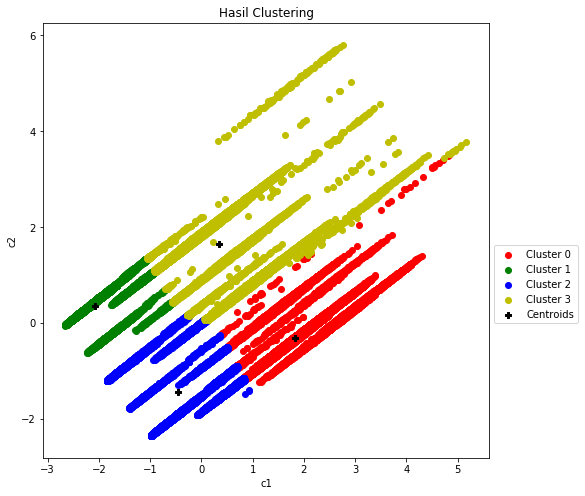

In [49]:
colors = ['r', 'g', 'b', 'y']

plt.figure(figsize=(8, 8))
plt.title('Hasil Clustering')
for i in range(k):
    plt.scatter(
        df_cluster[SELECTED_COLUMN[0]][df_cluster['Cluster'] == i], 
        df_cluster[SELECTED_COLUMN[1]][df_cluster['Cluster'] == i],
        color=colors[i],
        label=f'Cluster {i}'
    )
    plt.scatter(centroid[i][0], centroid[i][1], color='k', marker='P')
plt.scatter(centroid[0][0], centroid[0][1], color='k', label="Centroids", marker='P')
plt.xlabel(SELECTED_COLUMN[0])
plt.ylabel(SELECTED_COLUMN[1])
plt.legend(loc='best', bbox_to_anchor=(1, 0.5))
plt.show()

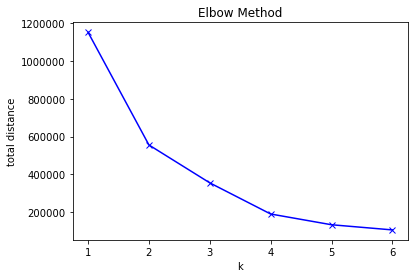

In [50]:
distances = []
K = range(1,7)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_pca)
    distances.append(km.inertia_)

plt.plot(K, distances, 'bx-')
plt.xlabel('k')
plt.ylabel('total distance')
plt.title('Elbow Method')
plt.show()